# Exploratory Data Analysis (EDA) for Patient Admissions Prediction

In this notebook, we will perform exploratory data analysis on the patient admissions dataset. The goal is to understand the dataset, visualize trends, and identify patterns related to patient admissions.

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modules de machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Configuration du style de visualisation
sns.set(style='whitegrid')

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Chargement des données avec le bon séparateur

data_path = "../data/raw/DATA_APHP.csv"

df = pd.read_csv(data_path, sep=";")

# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne (si > 0) :")
print(missing_values[missing_values > 0])

# Nettoyage de la colonne Target pour convertir les valeurs en float
df['Target'] = df['Target'].str.replace(' ', '').str.replace(',', '.').astype(float)

# Afficher les premières lignes de l'ensemble de données
df.head()

Valeurs manquantes par colonne (si > 0) :
Series([], dtype: int64)


,Periode,Mois,Target
0,2017,Juillet,57874.5
1,2017,Aout,54721.1
2,2017,Septembre,55683.0
3,2017,Octobre,57696.8
4,2017,Novembre,55706.1


# Visualisation


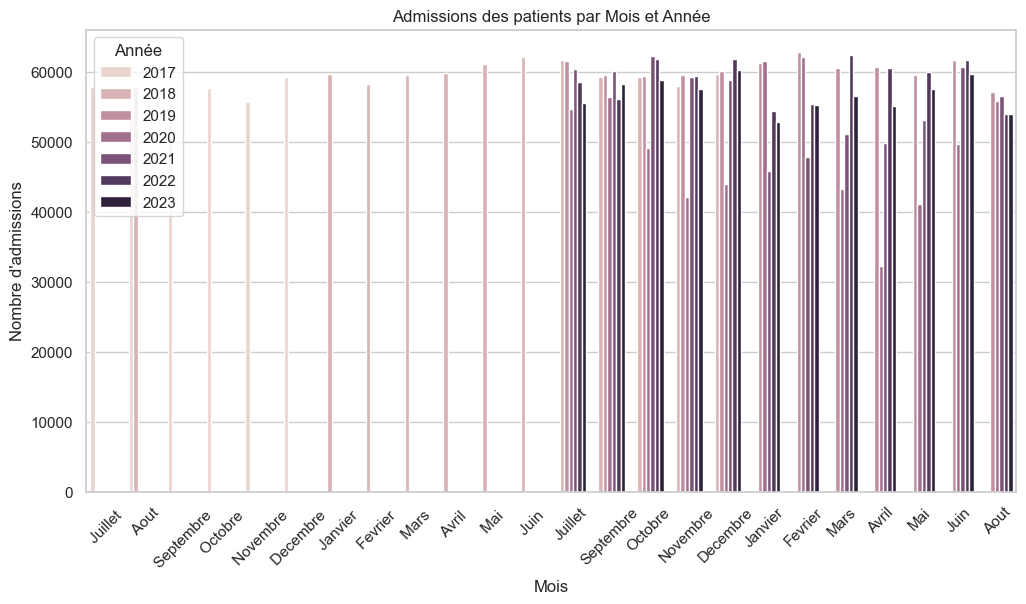

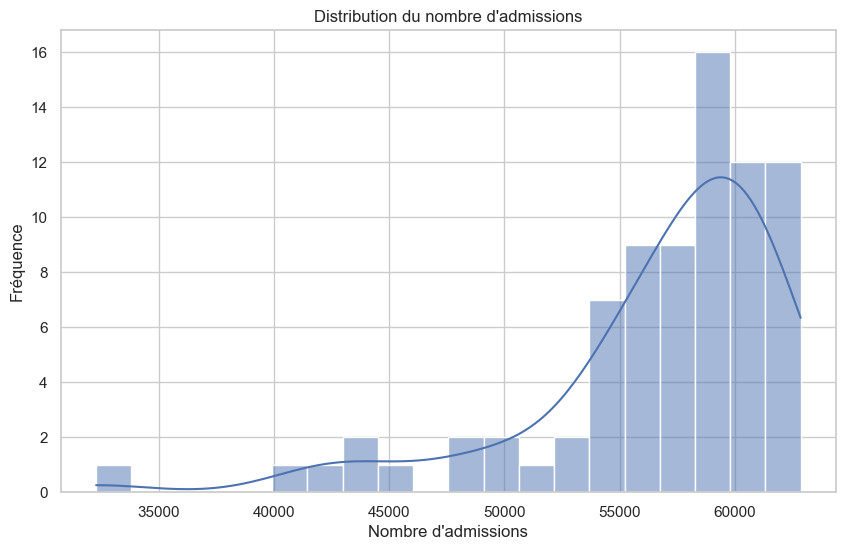

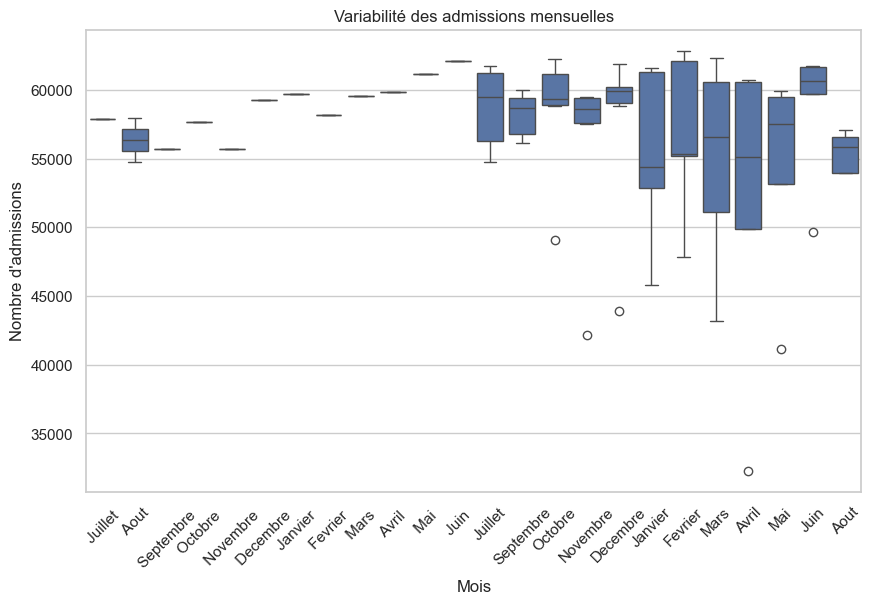

In [3]:
# Visualisation 1 : Admissions par Mois et Année
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Mois', y='Target', hue='Periode', errorbar=None)
plt.title('Admissions des patients par Mois et Année')
plt.xlabel('Mois')
plt.ylabel("Nombre d'admissions")
plt.xticks(rotation=45)
plt.legend(title='Année')
plt.show()

# Visualisation 2 : Distribution du nombre d'admissions
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Target', bins=20, kde=True)
plt.title("Distribution du nombre d'admissions")
plt.xlabel("Nombre d'admissions")
plt.ylabel("Fréquence")
plt.show()

# Visualisation 3 : Variabilité des admissions mensuelles
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Mois', y='Target')
plt.title('Variabilité des admissions mensuelles')
plt.xlabel('Mois')
plt.ylabel("Nombre d'admissions")
plt.xticks(rotation=45)
plt.show()


In [4]:
# Encodage one-hot pour les variables catégorielles
df = pd.get_dummies(df, drop_first=True)

# Séparation des variables explicatives et de la variable cible
X = df.drop(columns=['Target'])
y = df['Target']

# Optionnel : Standardisation des variables (utile pour les modèles linéaires)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)

# Modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nRégression Linéaire - Évaluation du modèle :")
print("Mean Squared Error :", mse_lr)
print("R² Score :", r2_lr)

# Instanciation du modèle RandomForest
rf = RandomForestRegressor(random_state=42)

# Grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nMeilleurs paramètres RandomForest :", grid_search.best_params_)

# Meilleur modèle trouvé
rf_best = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred_rf = rf_best.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest - Évaluation du modèle :")
print("Mean Squared Error :", mse_rf)
print("R² Score :", r2_rf)

# Validation croisée sur l'ensemble d'entraînement
cv_scores = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='r2')
print("Scores R² en Cross-Validation :", cv_scores)
print("Score R² moyen en Cross-Validation :", np.mean(cv_scores))


Taille de l'ensemble d'entraînement : (62, 24)
Taille de l'ensemble de test : (16, 24)

Régression Linéaire - Évaluation du modèle :
Mean Squared Error : 95908862.33495845
R² Score : -0.6087893710934507

Meilleurs paramètres RandomForest : {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}

Random Forest - Évaluation du modèle :
Mean Squared Error : 47078025.13261291
R² Score : 0.2103062782571291
Scores R² en Cross-Validation : [ 0.03434384 -0.33326191  0.17680036  0.21493681 -1.07671752]
Score R² moyen en Cross-Validation : -0.1967796827751559
